## K-means Clustering

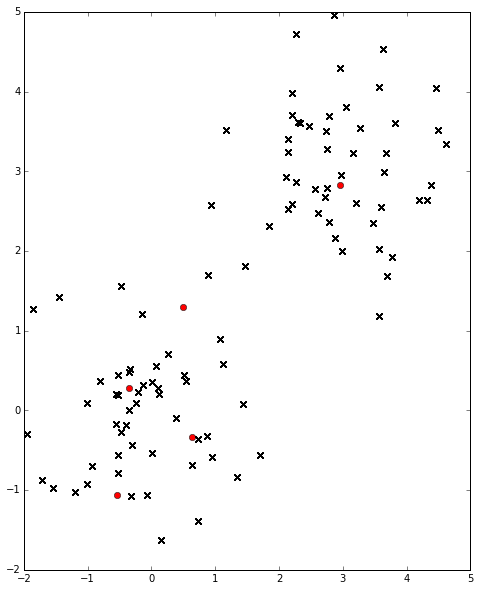

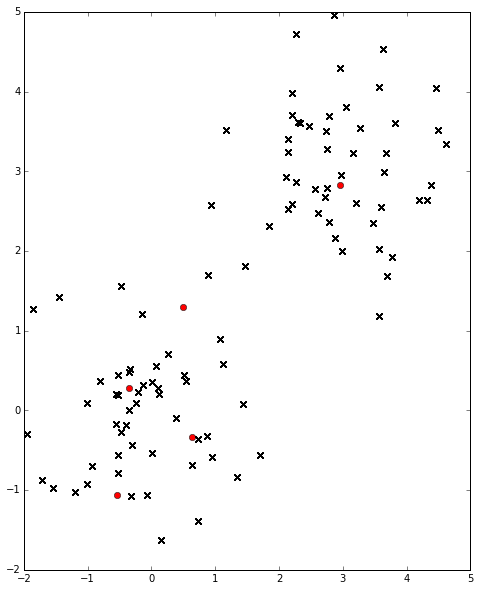

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

import time
from IPython import display

N = 100
D = 2
X1 = np.random.randn(D,N/2)
X2 = 0.8*np.random.randn(D,N/2) + 3*np.ones((D, N/2))

X = np.hstack((np.mat(X1), np.mat(X2)))

#plt.plot(X[0,:], X[1,:],'x')
#plt.show()

K = 5;

W = np.mat('[3,0;0,1]')
mu = X[:,0:K]
#plt.plot(mu[0,:],mu[1,:],'ro')

EP = 200

fig = plt.figure(figsize=(8,10))
plt.plot(X[0,:], X[1,:],'kx')

ax = fig.gca()
ln = plt.Line2D(xdata=mu[0,:], ydata=mu[1,:], marker='o', color='r',linestyle=None,linewidth=0)
ax.add_line(ln)

eta = 0.3

for e in range(EP):
    
    dist = np.zeros((N,K))
    for i in range(N):
        for c in range(K):
            err = X[:,i]-mu[:,c]
            dist[i,c] = float(err.T*W.I*err)
    
    # Assignments
    a = np.argmin(dist, axis=1)
    
    mu = np.mat(np.zeros((D,K)))
    count = np.zeros((K))
    for i,c in enumerate(a):
        count[c] += 1
        #mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1/count[c]*X[:,i]
        mu[:,c] = (1-eta)*mu[:,c] + eta*X[:,i]
    
    ln.set_xdata(mu[0,:])
    ln.set_ydata(mu[1,:])
    
    #plt.subplot(EP,1,e+1)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
    plt.plot(X[0,:], X[1,:],'kx')
    #plt.plot(mu[0,:],mu[1,:],'ro')

plt.show()
    

## SVD

[[-0.27178384 -0.68695254 -0.06148734  0.4272493   0.00402096 -0.1513811
   0.02996431 -0.6319934   0.73270656  1.41604634  0.31682215 -1.48061139
  -0.08188947 -0.25580301  0.82346341 -0.22943276  0.20392575  0.63260018
  -0.15095987  1.19067592  0.69470086 -0.50328369 -0.01189888 -1.12050844
   0.1129367  -0.06433369  0.32727297 -0.6736358   0.13550325 -2.06335767]
 [ 0.68643155 -0.49211519  0.5827548   0.09672223  1.07188718  0.87165245
  -1.34017859  1.99774755 -0.27870617 -0.95964831  0.01076813 -1.79994624
  -0.72738759 -0.95079763  1.01435088 -0.26568168 -1.79892967  1.15927628
  -0.82135806 -0.31342689  0.12822283 -0.53477584  2.18065339  0.87438316
  -0.95920637  1.50502881 -0.53102307 -0.68731283  2.46692924  0.20997204]
 [ 1.75157822  0.65803829  0.06591008  1.08197471 -0.88957676 -1.21935735
  -0.96341036  1.96135081  1.23434055  0.24783934  1.02953266 -0.15107712
  -1.28969139 -0.98262655  1.09311658  0.09747725  1.49034424  0.08722825
  -0.56725631 -2.49377916  0.56450124

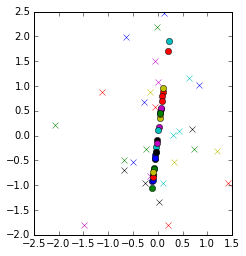

In [2]:
D = 4
N = 30

#X = np.mat('[1,2,3;5,7,2]')
X = np.mat(np.random.randn(D,N))


U,Sig,V = np.linalg.svd(X, full_matrices=True)

print(X)
print(U)
print(np.diag(Sig))
print(V)

a = U[:,0] 
w = Sig[0]*V[0,:]


Xhat = a*w


plt.plot(X[0,:], X[1,:],'x')
plt.plot(Xhat[0,:], Xhat[1,:],'o')
ax = plt.gca()
ax.set_aspect(1)
plt.show()


In [4]:


df_iris = pd.read_csv(u'../data/iris.txt',sep=' ')

df_iris

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


[[ 5.1  4.9  4.7  4.6  5. ]
 [ 3.5  3.   3.2  3.1  3.6]
 [ 1.4  1.4  1.3  1.5  1.4]
 [ 0.2  0.2  0.2  0.2  0.2]]


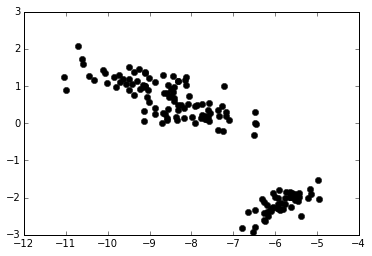

In [28]:
X = np.vstack((np.mat(df_iris.sl),np.mat(df_iris.sw), np.mat(df_iris.pl), np.mat(df_iris.pw) ))

#plt.plot(X[0,:], X[2,:],'kx')
#plt.show()

U,S,VT = np.linalg.svd(X)

K = 2

X_approx = U[:,0:2]*np.diag(S[0:2])*VT[0:2,:]

print(X[:,0:5])

X_approx[:,0:5]


Z = np.diag(S[0:2])*VT[0:2,:]
plt.plot(Z[0,:], Z[1,:],'ko')
plt.show()


## ALS : Alternating Least Squares



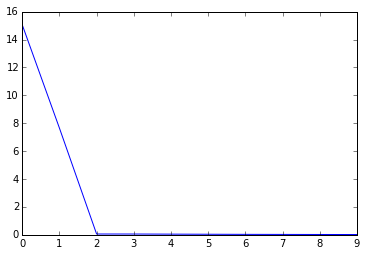

In [48]:

## Y = A*B

M = 10
N = 20
K = 2

A_true = np.mat(np.random.randn(M, K))
B_true = np.mat(np.random.randn(K, N))

Y = A_true*B_true + 0.01*np.random.randn(M, N)



#plt.imshow(Y, interpolation='nearest')



U,S,VT = np.linalg.svd(Y)

plt.plot(S)



In [49]:

B = np.linalg.pinv(A_true)*Y

print(B)

print(B_true)



[[-0.24689075  1.57755101 -0.40278582 -0.97668021  0.83105358 -0.39167884
   0.42919512  0.32386468 -0.21709037 -1.03028013  0.82323109 -0.21183812
   0.34578657 -2.27599858  1.70841411  1.0604837  -0.48612418 -0.10871185
   0.92060881 -0.02923552]
 [-1.02162883 -0.31562673 -0.26050259 -2.68765201 -0.07986925  1.67245433
  -0.65703119  1.49145806 -0.64543568  0.41723178 -2.12081694  0.45172714
   0.92322494  1.05729907 -0.95724887  0.85934019  1.07326711 -1.44889833
   0.28261623  1.84063881]]
[[-0.25720486  1.57520013 -0.40790521 -0.97979845  0.82904462 -0.38912155
   0.41717713  0.33143982 -0.21769882 -1.03915673  0.82424218 -0.20780859
   0.34309775 -2.26655924  1.71285713  1.06395845 -0.48792366 -0.11096627
   0.9202921  -0.02872279]
 [-1.02509732 -0.31157644 -0.26126411 -2.6852999  -0.09048101  1.67434223
  -0.6628631   1.49236572 -0.64664919  0.41193001 -2.12017968  0.44967789
   0.92065636  1.05725399 -0.94471663  0.86113879  1.06992555 -1.44693705
   0.28314188  1.83337281]]


In [58]:

A = np.mat(np.random.randn(M, K))
B = np.mat(np.random.randn(K, N))


for e in range(5):

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)

    B = np.linalg.pinv(A)*Y

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)

    A = (np.linalg.pinv(B.T)*Y.T).T

    Y_est = A*B
    E = Y - Y_est
    err = np.sum(np.sum(np.array(E)*np.array(E)))
    print(err)





616.260844618
206.41135676
0.022270864975
0.022270864975
0.012636800579
0.0126366287166
0.0126366287166
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107
0.0126366287107


In [59]:
A

matrix([[-3.84717275, -1.1647452 ],
        [ 0.59184538, -0.3115495 ],
        [-3.74445309,  3.04945327],
        [-8.20662843,  3.38580033],
        [-1.96267491, -0.82938965],
        [-1.59871863,  0.9701449 ],
        [-0.80395512, -1.67948961],
        [-2.77493982,  1.32603348],
        [ 1.34590873,  0.30487757],
        [-0.28603236,  0.10144157]])

In [60]:
A_true

matrix([[ 1.43190551, -1.19740565],
        [ 0.04161512,  0.12247163],
        [-0.83908214, -0.64963932],
        [-0.07577827, -1.82300917],
        [ 0.85587752, -0.63988428],
        [-0.18214254, -0.3192553 ],
        [ 1.06418939, -0.42793252],
        [-0.12095646, -0.59426192],
        [-0.44321394,  0.4036003 ],
        [ 0.00950295, -0.06394318]])

In [61]:
U,S,VT = np.linalg.svd(Y)

A.T*U[:,2:]


matrix([[ -1.63365721e-15,   6.36577266e-16,   2.19513670e-16,
          -2.04362614e-16,   6.70384178e-16,  -5.96420160e-16,
           1.41153760e-15,  -2.96043897e-16],
        [ -3.10030222e-16,   1.38068360e-16,  -5.57825729e-17,
           2.72405407e-16,  -8.13897637e-16,  -1.08668305e-16,
          -7.28972350e-17,   5.72466795e-16]])

## Stochastic Gradient Descent (SGD)

Rank of approximation is $1$

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

Nr = 2
Nc = 3

M = np.mat('[0, 1, 1;1, 1, 0]')
Y = np.mat('[0, 2, 4;3, 5, 0]')


Ys = np.mat('[2,0,1;4,0,2;3,1,0;5, 1,1]')

Ysize = Ys.shape[0]

A = np.mat(np.random.rand(Nr, 1))
B = np.mat(np.random.rand(1, Nc))

E = np.array(M)*np.array(Y - A*B)
np.sum(E*E)/np.sum(np.array(M))

EPOCH = 100
Eta = 0.1
eta = Eta

for i in range(EPOCH):
    E = np.array(M)*np.array(Y - A*B)
    Err = np.sum(E*E)/np.sum(np.array(M))
    print(Err)
    
    for k in range(Ysize):
        u = Ys[k,1]
        m = Ys[k,2]
        
        err = Ys[k,0] - A[u,0]*B[0,m]
        
        temp_A = A[u,0] + eta*err*B[0,m]
        B[0,m]   = B[0,m] + eta*err*A[u,0]
        A[u,0]   = temp_A
    
    eta = Eta*1./(i+1)



11.0769926265
7.80241114215
3.72357836563
2.4509723585
1.93478423846
1.65921234432
1.48448980809
1.36134211049
1.26840506668
1.19491850061
1.13483533098
1.08446670746
1.04141634864
1.00404899851
0.971203861101
0.942030035965
0.915886963914
0.892281523467
0.870826796322
0.851214174311
0.833193972481
0.816561632379
0.801147698012
0.786810398221
0.773430067496
0.760904887881
0.749147596114
0.738082906728
0.727645473492
0.717778260712
0.708431230131
0.69956027342
0.691126337598
0.683094703402
0.675434385877
0.66811763342
0.66111950667
0.654417522613
0.647991352265
0.641822562651
0.635894395587
0.630191577225
0.624700153412
0.619407346838
0.614301432627
0.609371629634
0.604608005149
0.600001391098
0.595543310135
0.591225910276
0.587041906933
0.582984531371
0.579047484777
0.575224897218
0.571511290897
0.567901547176
0.564390876925
0.560974793803
0.55764909014
0.554409815117
0.551253255005
0.548175915217
0.545174503999
0.542245917574
0.539387226595
0.536595663769
0.533868612536
0.531203596699

Rank of approximation is $K$

In [26]:
Nr = 2
Nc = 3
Nk = 2

M = np.mat('[0, 1, 1;1, 1, 0]')
Y = np.mat('[0, 2, 4;3, 5, 0]')
Ys = np.mat('[2,0,1;4,0,2;3,1,0;5, 1,1]')
Ysize = Ys.shape[0]

A = np.mat(np.random.rand(Nr, Nk))
B = np.mat(np.random.rand(Nk, Nc))

EPOCH = 1000
Eta = 0.1
eta = Eta

for i in range(EPOCH):
    E = np.array(M)*np.array(Y - A*B)
    Err = np.sum(E*E)/np.sum(np.array(M))
    if i%10==0:
        print(Err)
    
    for k in range(Ysize):
        u = Ys[k,1]
        m = Ys[k,2]
        
        err = Ys[k,0] - A[u,:]*B[:,m]
        
        temp_A = A[u,:] + eta*err[0,0]*B[:,m].T
        B[:,m]   = B[:,m] + eta*err[0,0]*A[u,:].T
        A[u,:]   = temp_A
    
    eta = Eta*1./(i+1)



9.44841615171
0.420382854252
0.283719146105
0.228599175324
0.196856661381
0.175567557721
0.160008306214
0.147989473885
0.138339231099
0.130366172363
0.123632444255
0.11784543093
0.112801114692
0.108352294072
0.104389715592
0.100830342601
0.097609774763
0.0946771868155
0.0919918530491
0.0895207017194
0.0872365569398
0.0851168506385
0.083142662846
0.0812979957244
0.0795692168686
0.0779446271016
0.0764141211256
0.0749689183211
0.0736013471673
0.0723046710917
0.0710729466518
0.0699009071805
0.0687838666588
0.0677176397842
0.0666984751034
0.0657229987572
0.0647881669005
0.0638912252587
0.0630296745887
0.0622012410501
0.0614038506827
0.0606356073332
0.0598947734934
0.0591797536058
0.0584890794699
0.0578213974433
0.0571754571822
0.0565501017068
0.0559442586122
0.0553569322696
0.0547871968909
0.0542341903442
0.0536971086265
0.0531752009128
0.0526677651109
0.0521741438633
0.051693720943
0.0512259179978
0.0507701916054
0.0503260306029
0.049892953663
0.0494705070881
0.0490582628019
0.048655816516

In [29]:
print(A*B)

print(Y)

B

[[ 2.04303373  2.29645561  3.79251518]
 [ 3.0449897   4.85768691  5.14681155]]
[[0 2 4]
 [3 5 0]]


matrix([[ 0.61072673,  1.67069499,  0.78689292],
        [ 1.11367322,  1.03927524,  2.14222199]])